# Final Presentation Notebook

### Introduction

In my personal notebook, I analyze which neighboorhood was cleaned up the most to determine which one is the most environmentally safe. This will be done by analyzing the area in acres covered in each neighborhood by clean-up crews which is my metric. Then, I will combine that data with data from another data set that contains the overall acres of each neighborhood to see which area was cleaned up the most. 

#### Step 1. Import all the datasets that must be used. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
beautify_pgh = pd.read_csv('Pittsburgh_Beautify_The_Burgh.csv')
neighborhoodData = pd.read_csv('neighborhoodData.csv')

#### Step 2. Here I will add up the areas covered by groups in each neighborhood and sort them from greatest to least. The first neighborhood would have had the most ground covered. 

In [7]:
# import pandas as pd
df = pd.read_csv('Pittsburgh_Beautify_The_Burgh.csv')

#sorts values
sortDataSetTwo = df.sort_values(by="Neighborhood")
df2 = sortDataSetTwo.groupby(['Neighborhood']).sum()


##coverts area in meters squared to acres 
df2['SHAPE_Area'] = df2['SHAPE_Area']/4046.8564224

#fixes index
df2['Neighborhood'] = df2.index
df2.reset_index(drop=True)

#Rename area 
df2=df2['SHAPE_Area'].rename_axis('Neighborhood').reset_index(name='area')
df2


,Neighborhood,area
0,Allegheny West,4.732557
1,Allentown,3.749644
2,Arlington,5.947094
3,Beltzhoover,23.596112
4,Bluff/Uptown,2.270216
5,Carrick,3.781603
6,Central Business District,9.649654
7,Central Oakland,50.399079
8,East Liberty,7.738735
9,Elliott,8.368664


In [8]:
#The graph above visualizes the amount 
#of cleanup done by crews in each neighborhood.




##Step 3 extract the total amount of acres from neighborhood. 
import pandas as pd
neighborhoodData = pd.read_csv('neighborhoodData.csv')
df = neighborhoodData.sort_values(by = "hood")
dfaa = df[['hood','acres']]
df3 = dfaa.reset_index(drop=True)
df3

,hood,acres
0,Allegheny Center,134.703
1,Allegheny West,90.841
2,Allentown,189.608
3,Arlington,302.320
4,Arlington Heights,84.592
...,...,...
85,Upper Lawrenceville,260.349
86,West End,128.679
87,West Oakland,138.372
88,Westwood,445.009


In [9]:
#reset index
sortednew =df2.reset_index(drop=True)

#merge sorted data from sortednew and df3
mergesorteddata = sortednew.merge(df3, how = 'left', left_on = 'Neighborhood', right_on = 'hood', suffixes=('area', 'acres'))

##Calculate Ratio
mergesorteddata['ratio'] = mergesorteddata['area'] / mergesorteddata['acres']

#sort the data
ratio = mergesorteddata.sort_values(["ratio"], ascending=True)

#replace NAN with 0s
finalchart = ratio.replace(np.nan, 0)

#display chart graph
finalchart

,Neighborhood,area,hood,acres,ratio
11,Hazelwood,2.810837,Hazelwood,1017.805,0.002762
5,Carrick,3.781603,Carrick,1075.670,0.003516
19,Sheraden,3.959767,Sheraden,572.125,0.006921
10,Greenfield,3.894347,Greenfield,497.028,0.007835
18,Shadyside,6.987445,Shadyside,592.104,0.011801
17,Point Breeze,10.301870,Point Breeze,645.695,0.015955
12,Homewood South,4.766865,Homewood South,256.093,0.018614
2,Arlington,5.947094,Arlington,302.320,0.019672
1,Allentown,3.749644,Allentown,189.608,0.019776
8,East Liberty,7.738735,East Liberty,373.650,0.020711


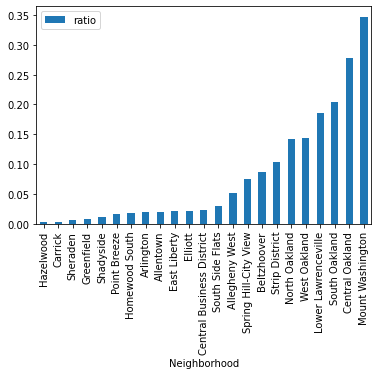

In [10]:
## The chart above displays the overall shape area of each neighborhood in acres 
## and the number of acres that were cleaned by crews. The real ratio represents
##the numbers of acres cleaned divided by overall acreage.


plot = ratio.head(23).plot.bar(x='Neighborhood', y='ratio')

## This is a bar plot visual of the areas that were 
##to least to most cleaned organzied by ratio.

### Conclusion

According to my notebook, the neighborhood with the largest area cleaned to area ratio is Mount Washington and the least is Hazelwood. Since my metrics are different from my other group members, my conclusions are different from their notebooks. My metric used my chosen dataset to find out which neighborhood was the cleanest by completing a calculation utilizing the area of the cleaning and dividing it by the total area of the neighborhood. Through that calculation, I was able to create the ratio and compare the neighborhoods. Additionally, my dataset did not contain as many neighborhoods because certain areas had more access to more volunteers available for clean-up. Thus, certain areas are more cared about by the overall population of pittsburgh than others. However, each data row is significant because it represents which cleanup crews were assigned to which neighborhood and how much each crew specifically cleaned up. 